<a href="https://colab.research.google.com/github/dnsm96/EDA/blob/main/Capstone_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

The hotel industry thrives on understanding and leveraging booking patterns, customer preferences, and operational efficiencies. This project focuses on conducting an Exploratory Data Analysis (EDA) of hotel booking data to uncover valuable insights that can drive strategic decisions, enhance customer satisfaction, and optimize revenue.

# **GitHub Link -**

https://github.com/dnsm96

# **Problem Statement**


The hospitality industry is highly competitive, and understanding booking patterns, customer preferences, and operational performance is crucial for making data-driven decisions that can enhance guest satisfaction and optimize revenue. Our goal is to perform an exploratory data analysis (EDA) on a dataset of hotel bookings to uncover insights and trends that can inform strategic decisions.

Data Overview:
The dataset comprises detailed information on hotel bookings, including booking dates, stay durations, customer demographics, booking channels, pricing, cancellation status, and special requests. The data spans multiple years and includes both city and resort hotels.

#### **Define Your Business Objective?**

##Optimizing Revenue and Guest Satisfaction through Data-Driven Strategies:

Utilize insights from lead time, total special requests, and historical booking patterns to:

**Implement Dynamic Pricing Strategies:** Adjust Average Daily Rate (ADR) dynamically based on lead time and demand fluctuations to maximize revenue without sacrificing occupancy rates.

**Launch Targeted Promotional Campaigns**: Tailor promotional offers and discounts to different lead time segments to attract early bookings and enhance occupancy during off-peak periods.

**Personalize Guest Experiences:** Leverage data on total special requests to anticipate and fulfill guest preferences, enhancing satisfaction and loyalty through personalized services and amenities.

**Enhance Operational Efficiency:** Streamline service delivery processes related to special requests by training staff and optimizing workflows, ensuring efficient and personalized service that meets guest expectations.

**Forecast Demand and Optimize Resources:** Utilize predictive analytics to forecast demand trends based on lead time data, enabling proactive planning of inventory, staffing, and operational resources to optimize efficiency and guest satisfaction.


By focusing on these objectives, the hotel can achieve competitive advantage, increased revenue, and improved guest loyalty through targeted marketing, personalized service delivery, and efficient operations management.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content.drive')


Mounted at /content.drive


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content.drive/MyDrive/Hotel Bookings.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])


31994

In [ ]:
df.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


<Axes: >

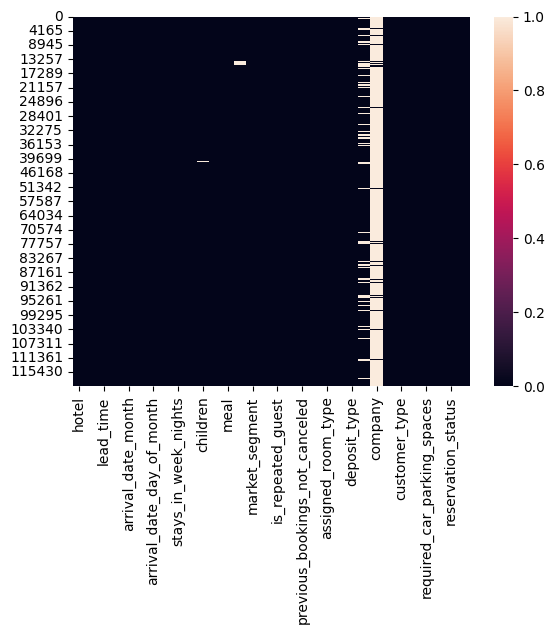

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull())

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Handling missing values
country_missing_percentage = (452/(len(df)))*100
round(country_missing_percentage,2)

0.52

In [ ]:
# 0.5 % data is missing from country column hence filling the missing values with a Default Value

df['country'].fillna('Unknown',inplace=True)

<ipython-input-12-821558cf1085>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown',inplace=True)


In [ ]:
agent_missing_percentage = (12193/(len(df)))*100
round(agent_missing_percentage,2)

13.95

In [ ]:
# less than 15% of values are missing, hence filling in the missing values with mean value
df['agent'].fillna(df['agent'].mean(),inplace=True)

<ipython-input-14-cf75e7165ff9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(df['agent'].mean(),inplace=True)


In [ ]:
company_missing_percentage = (82137/(len(df)))*100
round(company_missing_percentage,2)

93.98

In [ ]:
# 93%  of data is missing from company column, hence dropping the entire columns

df = df.drop('company',axis=1)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,94.138306,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,94.138306,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,94.138306,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,2017-09-07


### What did you know about your dataset?

The Dataset contains Hotel booking related data, such as cancellation, assigned room type, customer type, meal and as such.


We try to find the booking patters and customer preferences to properly accomodate customers and customize to their preferences


The dataset contains 119390 rows and 32 columns


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,104.995926,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description


| **Column Name**            | **Description**                                      |
|----------------------------|------------------------------------------------------|
| Distribution_channel       | How the customer accessed the stay - corporate booking/Direct/TA/TO |
| is_repeated_guest          | Guest coming for first time or not                   |
| previous_cancellation      | Was there a cancellation before                      |
| previous_bookings          | Count of previous bookings                           |
| reserved_room_type         | Type of room reserved                                |
| assigned_room_type         | Type of room assigned                                |
| booking_changes            | Count of changes made to booking                     |
| deposit_type               | Deposit type                                         |
| agent                      | Booked through agent                                 |
| days_in_waiting_list       | Number of days in waiting list                       |
| customer_type              | Type of customer                                     |
| required_car_parking       | If car parking is required                           |
| total_of_special_req       | Number of additional special requirements            |
| reservation_status         | Reservation status                                   |
| reservation_status_date    | Date of the specific status                          |

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df:
  unique_values = df[column].unique()
  print(f'Unique value in {column} : {unique_values}')

Unique value in hotel : ['Resort Hotel' 'City Hotel']
Unique value in is_canceled : [0 1]
Unique value in lead_time : [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 2

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Creating a new column that represents the total number of nights stayed (stays_in_weekend_nights + stays_in_week_nights).

df['total_nights_stayed'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.sort_values(by='total_nights_stayed',ascending = False).head()
round(df['total_nights_stayed'].mean(),2)


3.63

In [ ]:
#What is the average adr (average daily rate) for each hotel type?

average_adr = pd.DataFrame(df.groupby('hotel')['adr'].mean())
average_adr

,adr
hotel,
City Hotel,110.985944
Resort Hotel,99.025346


In [ ]:
#What is the total number of special requests for each customer type?
special_requests_based_on_customer_type = pd.DataFrame(df.groupby('customer_type')['total_of_special_requests'].sum())
special_requests_based_on_customer_type

,total_of_special_requests
customer_type,
Contract,2632
Group,351
Transient,52699
Transient-Party,5370


In [ ]:
#Checking what is the average lead time for bookings that were canceled versus those that were not

avg_lead_time_based_on_cancellation = pd.DataFrame(df.groupby('is_canceled')['lead_time'].mean())
avg_lead_time_based_on_cancellation


,lead_time
is_canceled,
0,70.099588
1,105.719251


In [ ]:
#Filtering the DataFrame to include only bookings with total_of_special_requests greater than 2.

filtered_df = df[df['total_of_special_requests'] >2].sort_values(by='lead_time')
filtered_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights_stayed
74727,City Hotel,0,0,2016,October,41,6,0,1,2,...,No Deposit,94.138306,0,Transient,0.0,0,4,Check-Out,2016-10-07,1
41607,City Hotel,0,0,2015,August,34,19,0,2,2,...,No Deposit,9.000000,0,Contract,97.0,0,3,Check-Out,2015-08-21,2
96374,City Hotel,0,0,2016,August,36,30,0,3,2,...,No Deposit,9.000000,0,Transient,129.0,0,3,Check-Out,2016-09-02,3
24871,Resort Hotel,0,0,2016,June,24,6,0,0,2,...,No Deposit,250.000000,0,Transient,0.0,0,3,Check-Out,2016-06-06,0
37367,Resort Hotel,0,0,2017,June,24,14,0,1,2,...,No Deposit,94.138306,0,Transient,148.5,0,3,Check-Out,2017-06-15,1


In [ ]:
# Finding out top 10 bookings based on adr

highest_adr = df.sort_values(by='adr',ascending = False)
highest_adr.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights_stayed
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.000000,0,Transient,5400.00,0,0,Canceled,2016-02-19,1
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,No Deposit,159.000000,0,Transient,510.00,0,0,Check-Out,2017-05-10,1
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,No Deposit,94.138306,0,Transient,508.00,1,0,Check-Out,2015-07-16,1
103912,City Hotel,0,81,2016,December,53,31,1,1,2,...,No Deposit,94.138306,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02,2
13142,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,No Deposit,314.000000,0,Transient,450.00,0,0,Canceled,2016-07-22,14
13391,Resort Hotel,1,59,2017,August,33,13,2,4,2,...,No Deposit,250.000000,0,Transient,437.00,0,0,Canceled,2017-08-03,6
39155,Resort Hotel,0,31,2017,August,31,1,2,6,2,...,No Deposit,250.000000,0,Transient,426.25,0,2,Check-Out,2017-08-09,8
39568,Resort Hotel,0,104,2017,August,33,17,2,3,3,...,No Deposit,240.000000,0,Transient,402.00,0,1,Check-Out,2017-08-22,5
39118,Resort Hotel,0,26,2017,July,31,31,3,5,3,...,No Deposit,250.000000,0,Transient,397.38,0,1,Check-Out,2017-08-08,8
39517,Resort Hotel,0,24,2017,August,33,17,0,3,2,...,No Deposit,240.000000,0,Transient,392.00,1,1,Check-Out,2017-08-20,3


In [ ]:
# checking where cancellation is common 'Resort Hotel' or 'City Hotel'

cancellation = df[df['is_canceled']==1]
cancellation_count = cancellation['hotel'].value_counts()
total_city = (df[df['hotel']=='City Hotel'].count())['hotel']
total_resort = (df[df['hotel']=='Resort Hotel'].count())['hotel']
city_cancellation_count = cancellation_count['City Hotel']
resort_cancellation_count = cancellation_count['Resort Hotel']

resort_cancellation_percentage = round((resort_cancellation_count/total_resort)*100,2)
city_cancellation_percentage = round((city_cancellation_count/total_city)*100,2)
print(f'Resort cancellation percentage = {resort_cancellation_percentage} \nCity Cancellation percentage = {city_cancellation_percentage}')

Resort cancellation percentage = 23.48 
City Cancellation percentage = 30.04


In [ ]:
#checking which month has the most arrivals
peak_month = df['arrival_date_month'].value_counts()
print(peak_month.idxmax(),"is the most busiest with arrivals of", peak_month.max())

August is the most busiest with arrivals of 11257


In [ ]:
# figuring out which countries has made most number of bookings.
df['country'].value_counts()

,count
country,
PRT,27453
GBR,10433
FRA,8837
ESP,7252
DEU,5387
...,...
MMR,1
BFA,1
CYM,1


In [ ]:
# Calculating the percentage of adults, kids and children

total_no_people_visited = (df['adults'].sum() + df['children'].sum() + df['babies'].sum())
percentage_adults = round(((df['adults'].sum())/total_no_people_visited)*100,2)
percentage_children = round(((df['children'].sum())/total_no_people_visited)*100,2)
percentage_babies = round(((df['babies'].sum())/total_no_people_visited)*100,2)

print(f'Of the total number of people who visited {percentage_adults}% were Adults, {percentage_children}% were Children, {percentage_babies}% were Babies ')

Of the total number of people who visited 92.62% were Adults, 6.85% were Children, 0.53% were Babies 


In [ ]:
#cancellation based on deposit type
total_canceled = pd.DataFrame(df[df['is_canceled']==1].groupby('deposit_type')['is_canceled'].count())
total_canceled['cancel_percentage'] = round((total_canceled['is_canceled']/total_canceled['is_canceled'].sum())*100,2)
total_canceled


,is_canceled,cancel_percentage
deposit_type,,
No Deposit,23016,95.80
Non Refund,983,4.09
Refundable,26,0.11


In [ ]:
#checking which customer type has made cancellatin previously
df.groupby('customer_type')['previous_cancellations'].count()

,previous_cancellations
customer_type,
Contract,3139
Group,544
Transient,71986
Transient-Party,11727



### What all manipulations have you done and insights you found?

#Creating a new column to figure out total number of days stayed
We start by creating a new column 'total_nights_stayed' which is a total of (stays_in_weekend_nights + stays_in_week_nights) to figure out the total number of days a customer has stayed. We can see that the maximum a customer has stayed in 69 days and the lead is 1. Also on average customers stay 3.63 days

#checking adr based on hotel type
The average adr based on hotel types are

*   City Hotel	110.985944
*   Resort Hotel	99.025346

# Checking special requests made by customer type
Total number of special requests made by individual customer type

*   Contract	2632
*   Group	351
*   Transient	52699
*   Transient-Party	5370

#Checking what is the average lead time for bookings that were canceled versus those that were not

* Not_cancelled -	70.099588
* Cancelled -	105.719251

#Checking which type of hotels are more likely to get cancelled
The  dataset contains two major hotels, resorts and city. We start by analysing which type of hotels are most cancelled, which is City with around 30% of bookings being cancelled

#Most Booked Month
Next we check which month has most number of bookings, this specific data can help in prior planning for the managements to properly accomodate the customers and increased demands

#Customer's diversity
We have also checked where the majory of the tourist populaation are coming from. And it seems like most of the population are from the European countries.
This data can hugely help to accomodate customers and provide care based on their needs. for example: Medication, as different etnic people may need different medical attention

#Cancellations by Customer Type
Finally we check which type of customers have made previous cancellations, since this data can be viable in mamging the current bookings.

#Misc calculation

* Filtering data based on the adr(descending)
* Filtering data with special requests greater than 2



In [ ]:
from google.colab import files

df.to_csv('df.csv', index=False)
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

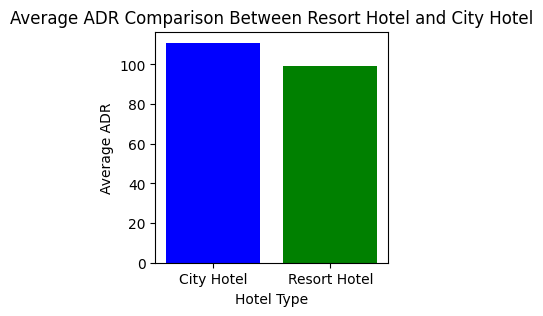

In [ ]:
# Chart - 1 visualization code
avg_adr_per_hotel = df.groupby('hotel')['adr'].mean().reset_index()

plt.figure(figsize=(3,3))
plt.bar(avg_adr_per_hotel['hotel'], avg_adr_per_hotel['adr'], color=['blue', 'green'])
plt.xlabel('Hotel Type')
plt.ylabel('Average ADR')
plt.title('Average ADR Comparison Between Resort Hotel and City Hotel')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chat is specifically selected because of its ability to clearly represent and compare each hotel type based on their adr

##### 2. What is/are the insight(s) found from the chart?

Based on comparision by bar chart, we can clearly see that city type hotel has the most adr

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on these insights management can look for opening new branches with city type to gain more adr

#### Chart - 2

<Figure size 1400x800 with 0 Axes>

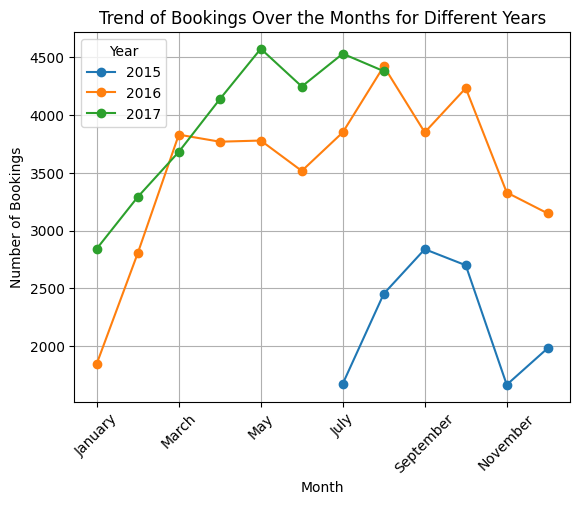

In [ ]:
# Chart - 2 visualization code

bookings_trend = df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='number_of_bookings')

bookings_pivot = bookings_trend.pivot(index='arrival_date_month', columns='arrival_date_year', values='number_of_bookings')

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bookings_pivot = bookings_pivot.reindex(months_order)

plt.figure(figsize=(14, 8))
bookings_pivot.plot(kind='line', marker='o')
plt.title('Trend of Bookings Over the Months for Different Years')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Trend Analysis: Line charts are excellent for showing trends over time. Since we are interested in observing how the number of bookings changes over the months for different years, a line chart effectively visualizes these trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

We can see the peak booking are done during the months of May-July

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help in planning for management, as the data helps the mangement on when to expect the peak crowds. Proper planning means more satisfied customers

#### Chart - 3

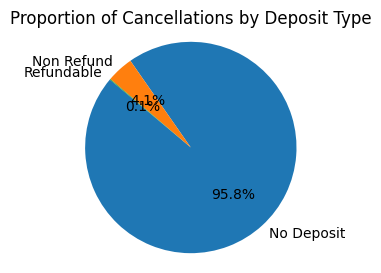

In [ ]:
# Chart - 3 visualization code
cancellations_by_deposit_type =  pd.DataFrame(df[df['is_canceled']==1].groupby('deposit_type')['is_canceled'].count())
cancellations_by_deposit_type['cancel_percentage'] = round((total_canceled['is_canceled']/total_canceled['is_canceled'].sum())*100,2)

plt.figure(figsize=(3,3))
plt.pie(cancellations_by_deposit_type['cancel_percentage'], labels=cancellations_by_deposit_type['cancel_percentage'].index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Cancellations by Deposit Type')
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

Proportional Representation: Pie charts are effective in showing parts of a whole. In this case, each segment of the pie represents the proportion (percentage) of cancellations for a specific deposit type relative to the total cancellations.



##### 2. What is/are the insight(s) found from the chart?

It becomes immediately apparent which deposit types have higher cancellation rates compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight is crucial for understanding which booking policies or deposit requirements might influence cancellation behavior.

#### Chart - 4

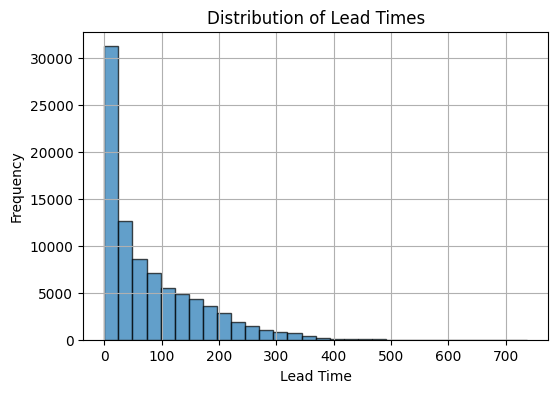

In [ ]:
# Chart - 4 visualization code
lead_times = df['lead_time']

plt.figure(figsize=(6,4))
plt.hist(lead_times, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.title('Distribution of Lead Times')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Distribution Representation: Histograms are effective for showing the distribution or frequency of numerical data, such as lead times. They provide a clear visual summary of how lead times are spread across different ranges or bins.

##### 2. What is/are the insight(s) found from the chart?

The distribution is heavily right-skewed, indicating that most bookings are made with shorter lead times. The frequency of bookings decreases as the lead time increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Understanding peak periods and variability in lead times can help businesses optimize staffing, inventory management, and resource allocation. For example, during peak lead time periods, businesses can ensure they have sufficient staff and inventory to meet customer demand, thereby improving customer satisfaction and operational efficiency.



#### Chart - 5

<ipython-input-37-789fb2e7847e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_type', y='lead_time', data=df, palette='Set3')


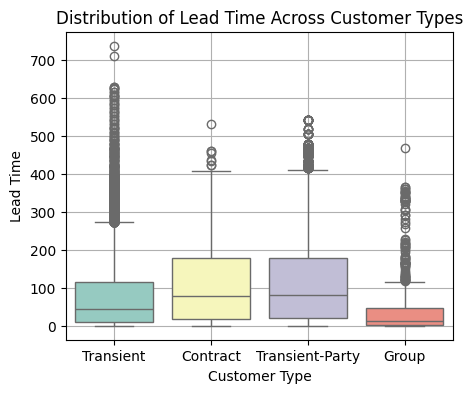

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(5, 4))
sns.boxplot(x='customer_type', y='lead_time', data=df, palette='Set3')
plt.xlabel('Customer Type')
plt.ylabel('Lead Time')
plt.title('Distribution of Lead Time Across Customer Types')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are effective for comparing the distribution of a numerical variable (lead time) across different categories (customer types). They provide a clear visual representation of the median, quartiles, and potential outliers within each category.

##### 2. What is/are the insight(s) found from the chart?

 The median line within each box indicates the central tendency of lead times for each customer type. And based on the chart we can say the transient has the most distribution

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights into lead time behaviors enable businesses to tailor marketing strategies more effectively. By understanding when and how different customer types book, businesses can design targeted promotions, incentives, and personalized offers to encourage bookings and enhance customer engagement.

#### Chart - 6

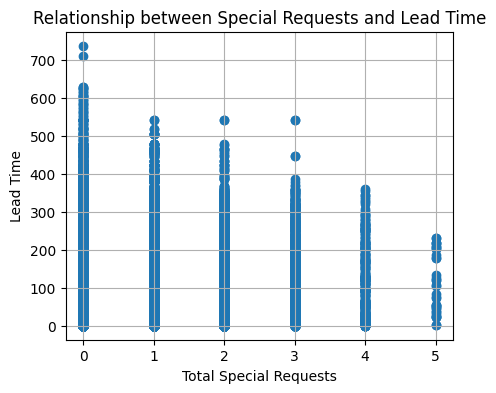

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(5, 4))
plt.scatter(df['total_of_special_requests'], df['lead_time'])
plt.xlabel('Total Special Requests')
plt.ylabel('Lead Time')
plt.title('Relationship between Special Requests and Lead Time')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Both lead time and ADR are continuous numeric variables, making a scatter plot suitable for displaying their relationship. Scatter plots effectively show the distribution and pattern of relationships between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

We observe that there isn’t a straightforward linear correlation between the number of special requests and lead time. Instead, there’s a wide range of lead times associated with each total number of special requests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding how lead time influences ADR allows businesses to implement more effective revenue management strategies. By adjusting pricing tiers based on lead time insights (e.g., offering discounts for early bookings or premium rates for last-minute bookings), businesses can maximize revenue potential and occupancy rates.

#### Chart - 7 - Correlation Heatmap

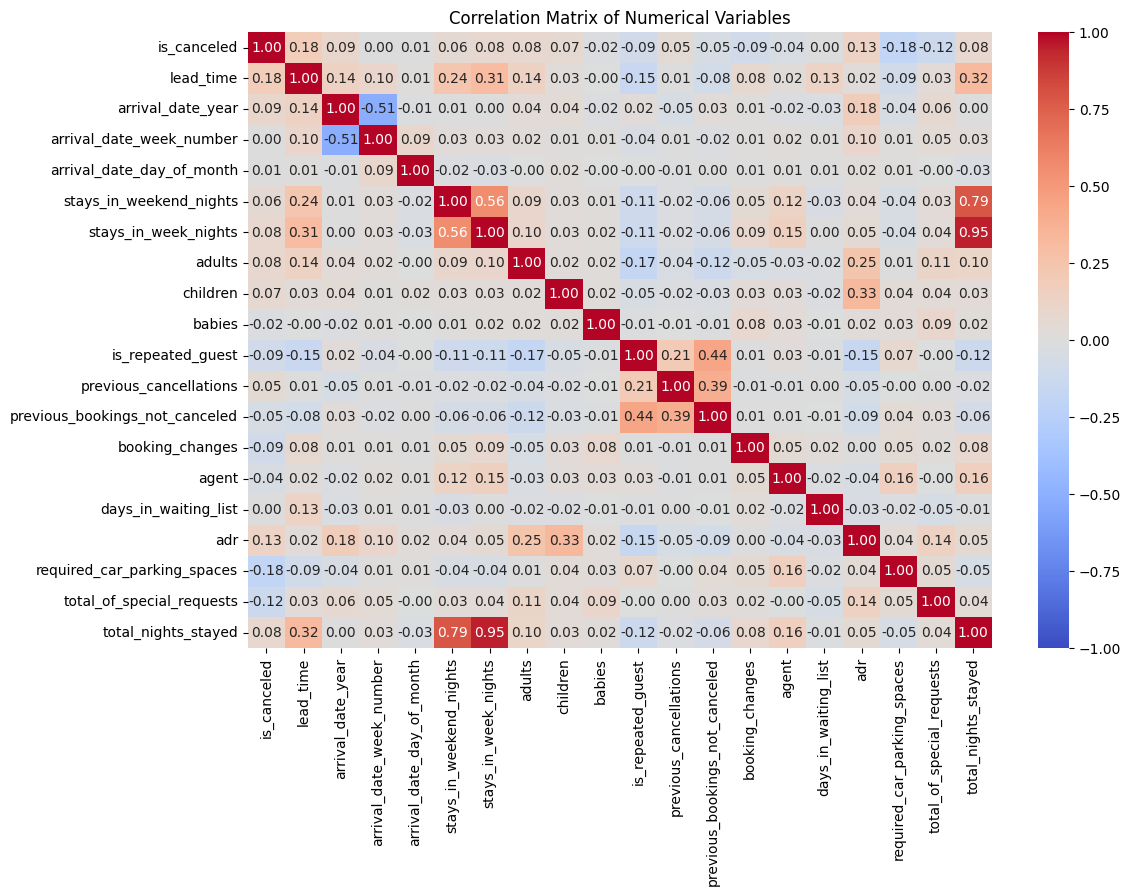

In [ ]:
# Correlation Heatmap visualization code
numerical_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap provides a comprehensive and easy-to-read visual representation of the correlation matrix. It allows for quick interpretation of the strength and direction of relationships between pairs of variables.



##### 2. What is/are the insight(s) found from the chart?

Positive values (shades of red) indicate a direct relationship, while negative values (shades of blue) suggest an inverse relationship.

Lead Time: Strong positive correlation with the number of stays in weekend nights (0.32) and total nights stayed (0.31).

Arrival Date Year: Weak negative correlation with lead time (-0.09).

Total Nights Stayed: Strong positive correlation with stays in weekend nights (0.79) and stays in week nights (0.95).

Previous Cancellations: Moderate positive correlation with previous bookings not canceled (0.44).

ADR (Average Daily Rate): Positive correlation with total special requests (0.33).

#### Chart - 8 - Pair Plot

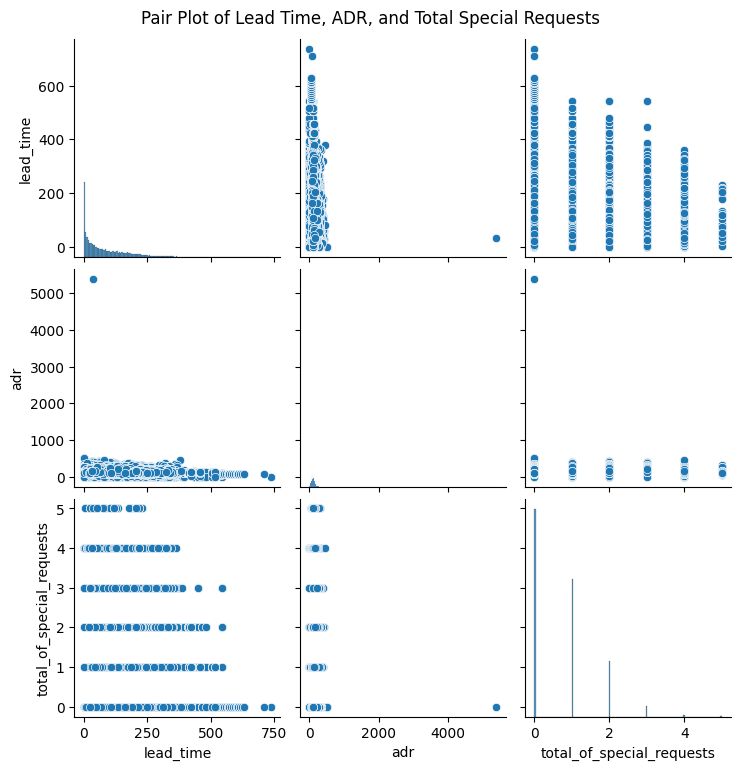

In [ ]:
# Pair Plot visualization code
selected_columns = ['lead_time', 'adr', 'total_of_special_requests']
pairplot_data = df[selected_columns]

# Creating the pair plot
sns.pairplot(pairplot_data)
plt.suptitle('Pair Plot of Lead Time, ADR, and Total Special Requests', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot allows for a comprehensive visualization of the pairwise relationships between multiple numerical variables in a single plot. This is particularly useful when you want to examine how each variable interacts with the others simultaneously.

##### 2. What is/are the insight(s) found from the chart?

Lead Time:

The scatter plots reveal a wide spread of data points for lead time. This suggests variability in the number of days booked in advance.
There is no clear linear relationship between lead time and the other variables.
ADR (Average Daily Rate):

Similar to lead time, ADR also shows a wide distribution of data points.
No strong linear correlation is evident between ADR and the other variables.
Total Special Requests:

Most data points cluster around lower values for total special requests.
This indicates that the majority of bookings have few or no special requests.
In summary, the chart doesn’t show straightforward relationships between these variables. Each factor seems to operate independently, without significant influence on the others

## **5. Solution to Business Objective**

**Dynamic Pricing Strategies:** Implement dynamic pricing models that adjust ADR based on lead time and demand fluctuations. Utilize insights from the relationship between lead time and ADR to offer competitive pricing while maximizing revenue during peak and off-peak periods.

**Promotional Campaigns:** Launch targeted promotional campaigns tailored to different lead time segments. Offer incentives such as early booking discounts or package deals that include additional services based on total special requests.

**Personalized Services:** Use insights from total special requests to personalize guest experiences. Anticipate customer preferences based on historical data and tailor services such as room preferences, amenities, or special accommodations.

**Efficient Service Delivery:** Improve operational efficiency in handling special requests by streamlining processes and training staff to provide prompt and personalized service.

**Forecasting and Planning:** Use predictive analytics based on lead time trends to forecast demand accurately. Optimize resource allocation, inventory management, and staffing levels to meet anticipated demand levels and enhance operational efficiency.

# **Conclusion**

In conclusion, achieving business objectives related to lead time, ADR, and total special requests requires a strategic approach that integrates data-driven insights with operational excellence and customer-centric initiatives

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***